In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import numpy as np
import pandas as pd
%cd "/content/gdrive/My Drive/thesis/Data"

#csv import labels

train_ACL_labels = np.array(pd.read_csv("train-acl.csv", header=None).iloc[:,1])
train_abnormal_labels = np.array(pd.read_csv("train-abnormal.csv", header=None).iloc[:,1])
train_meniscus_labels = np.array(pd.read_csv("train-meniscus.csv", header=None).iloc[:,1])
valid_ACL_labels = np.array(pd.read_csv("valid-acl.csv", header=None).iloc[:,1])
valid_abnormal_labels = np.array(pd.read_csv("valid-abnormal.csv", header=None).iloc[:,1])
valid_meniscus_labels = np.array(pd.read_csv("valid-meniscus.csv", header=None).iloc[:,1])

print('train acl', train_ACL_labels, 'shape', train_ACL_labels.shape)
print('train abn', train_abnormal_labels, 'shape', train_abnormal_labels.shape)
print('train m', train_meniscus_labels, 'shape', train_meniscus_labels.shape)
print('valid acl', valid_ACL_labels, 'shape', valid_ACL_labels.shape)
print('valid abn', valid_abnormal_labels, 'shape', valid_abnormal_labels.shape)
print('valid m', valid_meniscus_labels, 'shape', valid_meniscus_labels.shape)

#data path
train_path = "/content/gdrive/My Drive/thesis/Data/train"
train_axial_path = "/content/gdrive/My Drive/thesis/Data/train/coronal"

counter = 5
for filename in os.listdir(train_axial_path):
  if counter > 0:
    file0 = np.load(train_axial_path + '/' + filename)
    variancelist = []
    for slice in range(file0.shape[0]):
      variancelist.append(np.var(file0[slice,:,:]))
    print(file0)
    print('max', np.amax(file0))
    print('mean', np.mean(file0))
    print(filename, 'file shape', file0.shape, 'max_var_index', variancelist.index(max(variancelist)), max(variancelist))
    counter = counter - 1


/content/gdrive/My Drive/thesis/Data
train acl [0 1 0 ... 0 0 1] shape (1130,)
train abn [1 1 1 ... 0 1 1] shape (1130,)
train m [0 1 0 ... 0 0 0] shape (1130,)
valid acl [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0] shape (120,)
valid abn [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1] shape (120,)
valid m [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1] shape (120,)
[[[ 0  1  3 ...  0  0  0]
  [ 0  2  5

In [0]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


def alexnet(pretrained=False, progress=True, **kwargs):
    r"""AlexNet model architecture from the
    `"One weird trick..." <https://arxiv.org/abs/1404.5997>`_ paper.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    model = AlexNet(**kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls['alexnet'],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model

In [0]:
# model.py

import torch
import torch.nn as nn

from torchvision import models

class MRNet(nn.Module):
    def __init__(self):
        super().__init__()
        #model_setup = AlexNet()
        self.model = models.alexnet(pretrained=True)
        #self.model = models.alexnet(pretrained=True)
        #self.model = models.googlenet(pretrained=True)
        #self.model = models.densenet169(pretrained=True)
        #self.model = models.densenet121(pretrained=True)
        #self.model = models.densenet161(pretrained=True)
        self.gap = nn.AdaptiveAvgPool2d(1)
        #self.classifier = nn.Linear(1024, 1)
        self.classifier = nn.Linear(256, 1)

    # change this to adapt to different networks
    def forward(self, x):

        x = torch.squeeze(x, dim=0) # only batch size 1 supported

        x = self.model.features(x)

        # make sure that gap returns size 256
        x = self.gap(x).view(x.size(0), -1)
        #print('gap x', x.size())
        x = torch.max(x, 0, keepdim=True)[0]
        #print('max x', x.size())
        x = self.classifier(x)
        #print('x', x)
        return x

In [0]:
import argparse
import json
import numpy as np
import os
import torch

from datetime import datetime
from pathlib import Path
from sklearn import metrics

#from evaluate import run_model
#from loader import load_data
#from model import MRNet

def train(rundir, diagnosis, orientation, epochs, learning_rate, transformbool, use_gpu):
    
    val_auc_array = list()
    train_auc_array = list()
    train_loader, valid_loader, test_loader = load_data(diagnosis, orientation, transformbool, use_gpu)
    
    model = MRNet()
    
    if use_gpu:
        model = model.cuda()

    # modify the code in this
    # try with RAdam
    # grid search?
    # can try without weight decay
    optimizer = torch.optim.Adam(model.parameters(), learning_rate, weight_decay=.01)
    #optimizer = torch.optim.AdamW(model.parameters(), learning_rate, weight_decay=0.01)

    # patience too low (after 5 epochs, if AUC hasnt improved, slash learning rate .3), which is why high learning rate seems to work better
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=.3, threshold=1e-4)

    best_val_loss = float('inf')

    start_time = datetime.now()

    for epoch in range(epochs):
        change = datetime.now() - start_time
        print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
        
        train_loss, train_auc, _, _ = run_model(model, train_loader, train=True, optimizer=optimizer)
        #print(f'train loss: {train_loss:0.4f}')
        #print(f'train AUC: {train_auc:0.4f}')

        val_loss, val_auc, _, _ = run_model(model, valid_loader)
        #print(f'valid loss: {val_loss:0.4f}')
        #print(f'valid AUC: {val_auc:0.4f}')
        val_auc_array.append(val_auc)
        train_auc_array.append(train_auc)
        
        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss

            file_name = f'val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
            save_path = Path(rundir) / file_name

            # dont need to save stuff for now, model is too shitty
            #torch.save(model.state_dict(), save_path)
            #if epoch == (epochs-1):
            #  print('model saved at', str(save_path))
            #  torch.save(model.state_dict(), save_path)
            
    return val_auc_array, train_auc_array


In [0]:
# loader.py

!pip install medicaltorch

import numpy as np
import os
import pickle
import torch
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from medicaltorch import transforms as mt_transforms
import PIL
from random import sample

from torch.autograd import Variable

INPUT_DIM = 224
MAX_PIXEL_VAL = 255
MEAN = 58.09
STDDEV = 49.73

class Dataset(data.Dataset):
    def __init__(self, datadirs, diagnosis, orientation, use_gpu, transformbool):
        super().__init__()
        self.use_gpu = use_gpu
        self.transformbool = transformbool
        label_dict = {}
        self.paths = []
        print(datadirs)
        
        self.orientation = orientation
        self.diagnosis = diagnosis

        """
        for i, line in enumerate(open('metadata.csv').readlines()):
            if i == 0:
                continue
            line = line.strip().split(',')
            path = line[10]
            label = line[2]
            label_dict[path] = int(int(label) > diagnosis)
        for dir in datadirs:
            for file in os.listdir(dir):
                self.paths.append(dir+'/'+file)

        self.labels = [label_dict[path[6:]] for path in self.paths]

        neg_weight = np.mean(self.labels)
        self.weights = [neg_weight, 1 - neg_weight]
        """

        train_string = "/content/gdrive/My Drive/thesis/Data/train"
        valid_string = "/content/gdrive/My Drive/thesis/Data/valid"

        if datadirs == train_string:
          if diagnosis == 'ACL':
            self.labels = train_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = train_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = train_abnormal_labels
        if datadirs == valid_string:
          if diagnosis == 'ACL':
            self.labels = valid_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = valid_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = valid_abnormal_labels


        direct = datadirs + '/' + self.orientation
        for file in os.listdir(direct):
          self.paths.append(direct + '/' + file)
        self.paths.sort()

        #print("paths", self.paths[0:10])

        neg_weight = np.mean(self.labels)
        self.weights = [neg_weight, 1 - neg_weight]

        print(self.labels.shape)
        print(self.weights)


    def weighted_loss(self, prediction, target):
        weights_npy = np.array([self.weights[int(t[0])] for t in target.data])
        weights_tensor = torch.FloatTensor(weights_npy)
        if self.use_gpu:
            weights_tensor = weights_tensor.cuda()
        loss = F.binary_cross_entropy_with_logits(prediction, target, weight=Variable(weights_tensor))
        return loss

      
    # Data augmentation section
    # can go through each cases, looking at the histogram of 3T vs 1.5T (naive distribution of contrast data?)
    def __getitem__(self, index):
        #print('paths', self.paths)
        path = self.paths[index]

        # with open(path, 'rb') as file_handler: # Must use 'rb' as the data is binary
        #    vol = pickle.load(file_handler).astype(np.int32)
        
        vol = np.load(path)

        """
        # crop middle
        pad = int((vol.shape[2] - INPUT_DIM)/2)
        #print('pad', pad)
        vol = vol[:,pad:-pad,pad:-pad]
        #vol = vol[pad:-pad,pad:-pad,:]
  
        # see if theres a way to reformat an image from 196 to 224 
        # something called interpolate, scikit image. 
        # consider scipy zoom too?


        problemflag = False

        if not(vol.shape[1] == 224) or not(vol.shape[2] == 224):
          #print('problem vol shape', vol.shape)
          delta_1 = (INPUT_DIM - vol.shape[1]) // 2
          delta_2 = (INPUT_DIM - vol.shape[2]) // 2
          padding = (delta_1, delta_2)
          new_vol = np.zeros((vol.shape[0], 224, 224), dtype=np.int32)
          for slice in range(vol.shape[0]):
            vol_slice = vol[slice,:,:]
            img_slice = PIL.Image.fromarray(vol_slice)
            new_vol[slice,:,:] = np.array(PIL.ImageOps.fit(img_slice, [224, 224]), dtype='i')
          vol = new_vol  
          vol.astype(np.int32)
          problemflag = True
          #print('vol shape', vol.shape)
          #print('vol type', vol.dtype)

        """
        #MEAN = np.mean(vol)
        #STDDEV = np.std(vol)

        # standardize
        vol = (vol - np.min(vol)) / (np.max(vol) - np.min(vol) + 1.0e-6) * MAX_PIXEL_VAL
        vol = (vol - MEAN) / STDDEV

        vol = vol.astype(np.float32)

        flag = False
        randomangle = 0

        # define transform policy
        hor_flip = np.random.rand(1)
        ran_rot = np.random.rand(1)
        randomangle = np.random.uniform(-30, 30)
        uni_noise = np.random.rand(1)

        """
        if ran_rot < 0.5:
          randomangle = 0
        """

        if self.transformbool:
          #if np.random.rand(1) < 0.5:
          flag = True

          if uni_noise < 0.5:
            noise_array = np.random.uniform(0.8,1.2,256*256)
            noise_array.resize((256,256))
            
            vol = np.multiply(vol, noise_array)
            vol = np.clip(vol, 0, 255)
            vol = vol.astype(np.float32)

            #randomangle = np.random.uniform(-20,20)
          self.transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToPILImage(),
            #torchvision.transforms.Resize((224,224)),
            torchvision.transforms.RandomHorizontalFlip(p=(hor_flip < 0.5)), 
            torchvision.transforms.RandomRotation((randomangle,randomangle), resample=PIL.Image.BILINEAR),
            #torchvision.transforms.RandomCrop((224,224),pad_if_needed=True),
            torchvision.transforms.ToTensor()
        ])

        if flag:
          for sliceindex in range(vol.shape[0]):
            vol[sliceindex] = self.transforms(np.array(vol[sliceindex]))


        # standardize
        #vol = (vol - np.min(vol)) / (np.max(vol) - np.min(vol) + 1.0e-6) * MAX_PIXEL_VAL

        # normalize
        # problems with the normalization, fix
        # vol = (vol - MEAN) / STDDEV

        # convert to RGB
        #vol = np.stack((vol,)*3, axis=1)
        #print('vol2', vol.shape)

        #new_vol = self.transforms(vol).float()
        #print('new_vol', new_vol.shape)

        """
        if uni_noise < 0.5:
          save_fig = PIL.Image.fromarray(np.uint8(np.array(vol[15,:,:])))
          save_fig = save_fig.convert("L")
          #save_fig.show()
          #file_name = f'path{path}_transform{flag}_angle{randomangle:0.4f}'
          newpath = str(path).replace('/', ' ')
          file_name = "path" + newpath + " transform" + str(flag) + " angle" + str(round(randomangle)) + "_2.png"
          save_path = Path(rundir) / "noise" /  file_name
          save_fig.save(save_path)
        """
        #assert(1==2)
        vol = np.stack((vol,)*3, axis=1)

        #print('volume shape', vol.shape)

        vol_tensor = torch.FloatTensor(vol)
        label_tensor = torch.FloatTensor([self.labels[index]])
        #print('vol tensor shape', vol_tensor.shape)
        #print('label_tensor shape', label_tensor.shape)
        #assert(1==3)
        return vol_tensor, label_tensor

    def __len__(self):
        return len(self.paths)

def load_data(diagnosis, orientation, transformbool, use_gpu=True):

    print('load_data', diagnosis, orientation)

    train_path = "/content/gdrive/My Drive/thesis/Data/train"
    valid_path = "/content/gdrive/My Drive/thesis/Data/valid"

    batchsize = 1
    numworkers = 4
    
    #assert(1==2)
    #train_dataset = Dataset(train_dirs, diagnosis, use_gpu)
    train_dataset = Dataset(train_path, diagnosis, orientation, use_gpu, transformbool)
    valid_dataset = Dataset(valid_path, diagnosis, orientation, use_gpu, False)
    #test_dataset = Dataset(test_dirs, /diagnosis, use_gpu, False)

    train_loader = data.DataLoader(train_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=True)
    valid_loader = data.DataLoader(valid_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    #test_loader = data.DataLoader(test_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    return train_loader, valid_loader, valid_loader #test_loader


In [0]:
# evaluate.py

import argparse
import matplotlib.pyplot as plt
import os
import numpy as np
import torch

from sklearn import metrics
from torch.autograd import Variable

#from loader import load_data
#from model import MRNet

def get_parser():
    parser = argparse.ArgumentParser()
    parser.add_argument('--model_path', type=str, required=True)
    parser.add_argument('--split', type=str, required=True)
    parser.add_argument('--diagnosis', type=int, required=True)
    parser.add_argument('--gpu', action='store_true')
    return parser

def run_model(model, loader, train=False, optimizer=None):
    preds = []
    labels = []

    if train:
        model.train()
    else:
        model.eval()

    total_loss = 0.
    num_batches = 0

    for batch in loader:
        if train:
            optimizer.zero_grad()

        vol, label = batch
        if loader.dataset.use_gpu:
            vol = vol.cuda()
            label = label.cuda()
        vol = Variable(vol)
        label = Variable(label)

        logit = model.forward(vol)

        loss = loader.dataset.weighted_loss(logit, label)
        total_loss += loss.item()

        #
        pred = torch.sigmoid(logit)
        pred_npy = pred.data.cpu().numpy()[0][0]
        label_npy = label.data.cpu().numpy()[0][0]

        preds.append(pred_npy)
        labels.append(label_npy)

        if train:
            loss.backward()
            optimizer.step()
        num_batches += 1

    avg_loss = total_loss / num_batches

    fpr, tpr, threshold = metrics.roc_curve(labels, preds)
    auc = metrics.auc(fpr, tpr)

    return avg_loss, auc, preds, labels

def evaluate(split, model_path, diagnosis, orientation, use_gpu):
    train_loader, valid_loader, test_loader = load_data(diagnosis, orientation, transformbool, use_gpu)
    model = MRNet()
    state_dict = torch.load(model_path, map_location=(None if use_gpu else 'cpu'))
    model.load_state_dict(state_dict)

    if use_gpu:
        model = model.cuda()

    if split == 'train':
        loader = train_loader
    elif split == 'valid':
        loader = valid_loader
    elif split == 'test':
        loader = test_loader
    else:
        raise ValueError("split must be 'train', 'valid', or 'test'")

    loss, auc, preds, labels = run_model(model, loader)

    print(f'{split} loss: {loss:0.4f}')
    print(f'{split} AUC: {auc:0.4f}')

    return preds, labels

#if __name__ == '__main__':
#    args = get_parser().parse_args()
#   evaluate(args.split, args.model_path, args.diagnosis, args.gpu)

In [0]:
gpu = True
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

#learningrate = 5e-05
epochs = 80
#diagnosis = 'ACL'
rundir = "/content/gdrive/My Drive/thesis/Data"
#orientation = 'axial'

if gpu:
  torch.cuda.manual_seed_all(seed)

# larger learning rates
learn1 = 0.001
learn2 = 0.001
learn3 = 0.001
learn4 = 0.001
learn5 = 0.001

#varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, learn1, gpu)
#varray2, tarray2 = train(rundir, diagnosis, epochs, learn2, gpu)
#varray3, tarray3 = train(rundir, diagnosis, epochs, learn3, gpu)
#varray4, tarray4 = train(rundir, diagnosis, epochs, learn4, gpu)
#varray5, tarray5 = train(rundir, diagnosis, epochs, learn5, gpu)

#varray2, tarray2 = varray1, tarray1
#varray3, tarray3 = varray1, tarray1
#varray4, tarray4 = varray1, tarray1
#varray5, tarray5 = varray1, tarray1

def display_single(x_length, lr1, varray, tarray, title, xlabel, ylabel):
  plt.figure(0)
  plt.title(title)
  plt.plot(np.arange(x_length), varray, label='valid')
  plt.plot(np.arange(x_length), tarray, label='train')
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  return

def display_line(x_length, lr1, y1, lr2, y2, lr3, y3, lr4, y4, lr5, y5, title, xlabel, ylabel):
  plt.figure(0)
  # see if we can set axis later
  #ax = plt.axis()
  #ax.set(xlim = (np.min(x),np.max(x)), option='tight')
  plt.title(title)
  plt.plot(np.arange(x_length), y1, label=str(lr1))
  plt.plot(np.arange(x_length), y2, label=str(lr2))
  plt.plot(np.arange(x_length), y3, label=str(lr3))
  plt.plot(np.arange(x_length), y4, label=str(lr4))
  plt.plot(np.arange(x_length), y5, label=str(lr5))
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  return

#display_line(epochs, learn1, varray1, learn2, varray2, learn3, varray3, learn4, varray4, learn5, varray5, "Trained AlexNet Val AUC over epochs diagnosis = " + str(diagnosis), "epoch", "Validation AUC")
#display_line(epochs, learn1, tarray1, learn2, tarray2, learn3, tarray3, learn4, tarray4, learn5, tarray5, "Trained AlexNet Train AUC over epochs diagnosis = " + str(diagnosis), "epoch", "Training AUC")

load_data ACL axial
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:01<00:00, 146MB/s]


starting epoch 1. time passed: 0:00:00.000016
train loss: 303020.5782
train AUC: 0.5269
valid loss: 0.4003
valid AUC: 0.4456
starting epoch 2. time passed: 0:04:40.526811
train loss: 601.2004
train AUC: 0.4947
valid loss: 0.3432
valid AUC: 0.5000
starting epoch 3. time passed: 0:05:43.874950
train loss: 78834.9430
train AUC: 0.5028
valid loss: 0.4217
valid AUC: 0.4301
starting epoch 4. time passed: 0:06:47.280820
train loss: 0.2183
train AUC: 0.5032
valid loss: 0.3438
valid AUC: 0.5000
starting epoch 5. time passed: 0:07:51.500873
train loss: 1000.1436
train AUC: 0.5165
valid loss: 0.3432
valid AUC: 0.5000
starting epoch 6. time passed: 0:08:55.836908
train loss: 3719.6646
train AUC: 0.4675
valid loss: 19.9771
valid AUC: 0.4850
starting epoch 7. time passed: 0:10:00.450492
train loss: 25.7795
train AUC: 0.4729
valid loss: 0.3432
valid AUC: 0.5000
starting epoch 8. time passed: 0:11:04.501470
train loss: 2.2623
train AUC: 0.4781
valid loss: 0.3435
valid AUC: 0.5000
starting epoch 9. tim

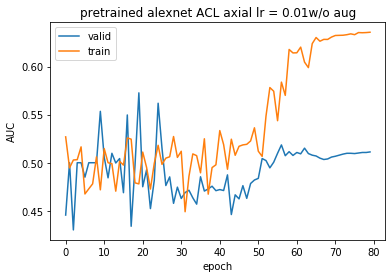

In [0]:
#axial w/o aug
epochs = 80
diagnosis = 'ACL'
orientation = 'axial'
lr = 0.01
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data ACL axial
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000013
train loss: 44332.0380
train AUC: 0.5063
valid loss: 0.3516
valid AUC: 0.4683
starting epoch 2. time passed: 0:01:41.604253
train loss: 0.8436
train AUC: 0.5186
valid loss: 0.3433
valid AUC: 0.5000
starting epoch 3. time passed: 0:03:24.504865
train loss: 69.0491
train AUC: 0.4896
valid loss: 0.3549
valid AUC: 0.5048
starting epoch 4. time passed: 0:05:07.791744
train loss: 69.6932
train AUC: 0.4726
valid loss: 0.3673
valid AUC: 0.5222
starting epoch 5. time passed: 0:06:51.431241
train loss: 2.4744
train AUC: 0.4778
valid loss: 46.3898
valid AUC: 0.5028
starting epoch 6. time passed: 0:08:34.481834
train loss: 140.5830
train AUC: 0.5309
valid loss: 0.8721
valid AUC: 0.4531
starting epoch 7. time passed: 0:10:17.922599
train loss: 13.0559
train AUC: 0.4597
valid loss: 0.

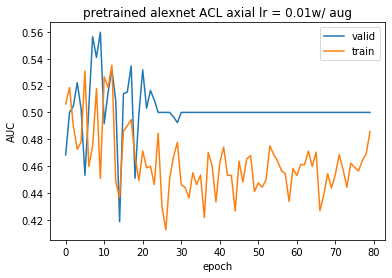

In [0]:
#axial w/ aug
diagnosis = 'ACL'
orientation = 'axial'
lr = 0.01
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000015
train loss: 1.4946
train AUC: 0.4922
valid loss: 0.3437
valid AUC: 0.4933
starting epoch 2. time passed: 0:03:15.970651
train loss: 0.5840
train AUC: 0.5122
valid loss: 0.3426
valid AUC: 0.5974
starting epoch 3. time passed: 0:04:18.712465
train loss: 0.8667
train AUC: 0.4802
valid loss: 0.3378
valid AUC: 0.6703
starting epoch 4. time passed: 0:05:18.639777
train loss: 0.3141
train AUC: 0.5213
valid loss: 0.3479
valid AUC: 0.3465
starting epoch 5. time passed: 0:06:18.270841
train loss: 0.2635
train AUC: 0.4349
valid loss: 0.3433
valid AUC: 0.3361
starting epoch 6. time passed: 0:07:18.510426
train loss: 0.2140
train AUC: 0.4921
valid loss: 0.3432
valid AUC: 0.3451
starting epoch 7. time passed: 0:08:18.729568
train loss: 0.2083
train AUC: 0.4873
valid loss: 0.3431
va

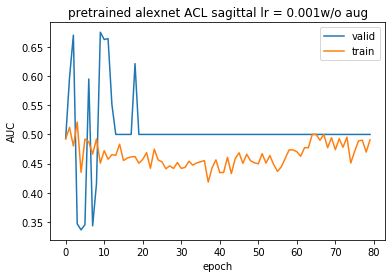

In [0]:
#sag w/o aug
diagnosis = 'ACL'
orientation = 'sagittal'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000013
train loss: 6.1967
train AUC: 0.4877
valid loss: 0.3443
valid AUC: 0.4287
starting epoch 2. time passed: 0:01:29.088335
train loss: 0.6017
train AUC: 0.5046
valid loss: 0.3535
valid AUC: 0.6322
starting epoch 3. time passed: 0:02:58.983452
train loss: 0.2218
train AUC: 0.4947
valid loss: 0.3435
valid AUC: 0.3673
starting epoch 4. time passed: 0:04:30.045093
train loss: 0.6608
train AUC: 0.4449
valid loss: 0.3508
valid AUC: 0.3858
starting epoch 5. time passed: 0:06:01.204638
train loss: 0.5236
train AUC: 0.4578
valid loss: 0.3443
valid AUC: 0.3162
starting epoch 6. time passed: 0:07:32.750608
train loss: 0.2092
train AUC: 0.4845
valid loss: 0.3447
valid AUC: 0.3027
starting epoch 7. time passed: 0:09:03.863678
train loss: 2.1873
train AUC: 0.4618
valid loss: 0.3434
va

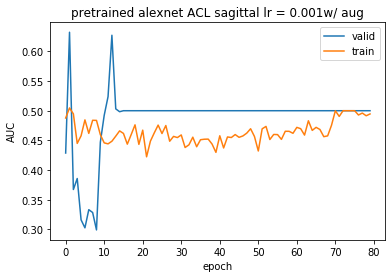

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000014
train loss: 6827.7595
train AUC: 0.5004
valid loss: 0.3438
valid AUC: 0.4663
starting epoch 2. time passed: 0:03:21.371233
train loss: 0.8213
train AUC: 0.4844
valid loss: 0.3433
valid AUC: 0.4169
starting epoch 3. time passed: 0:04:24.895508
train loss: 1163.5182
train AUC: 0.4924
valid loss: 0.3386
valid AUC: 0.4907
starting epoch 4. time passed: 0:05:23.539125
train loss: 20.4950
train AUC: 0.4880
valid loss: 4.1258
valid AUC: 0.4818
starting epoch 5. time passed: 0:06:22.058104
train loss: 110.5158
train AUC: 0.4953
valid loss: 46.7779
valid AUC: 0.4933
starting epoch 6. time passed: 0:07:20.689425
train loss: 17.5867
train AUC: 0.5310
valid loss: 2.3874
valid AUC: 0.5128
starting epoch 7. time passed: 0:08:19.051762
train loss: 463.7495
train AUC: 0.4977
valid los

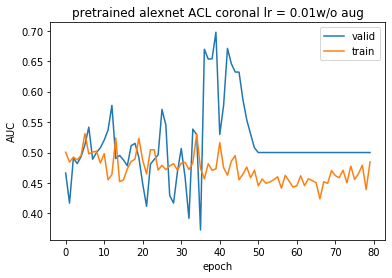

In [0]:
#cor w/o aug
diagnosis = 'ACL'
orientation = 'coronal'
lr = 0.01
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data ACL coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000014
train loss: 0.2856
train AUC: 0.5612
valid loss: 0.3374
valid AUC: 0.5847
starting epoch 2. time passed: 0:01:44.199051
train loss: 0.2310
train AUC: 0.5489
valid loss: 0.3403
valid AUC: 0.6105
starting epoch 3. time passed: 0:03:27.979592
train loss: 0.2453
train AUC: 0.5580
valid loss: 0.3811
valid AUC: 0.5087
starting epoch 4. time passed: 0:05:11.360447
train loss: 0.2179
train AUC: 0.5309
valid loss: 0.3425
valid AUC: 0.5328
starting epoch 5. time passed: 0:06:53.866122
train loss: 0.2083
train AUC: 0.5472
valid loss: 0.3390
valid AUC: 0.6027
starting epoch 6. time passed: 0:08:37.477473
train loss: 0.2228
train AUC: 0.5544
valid loss: 0.3426
valid AUC: 0.5247
starting epoch 7. time passed: 0:10:18.706770
train loss: 0.2087
train AUC: 0.5223
valid loss: 0.3382
val

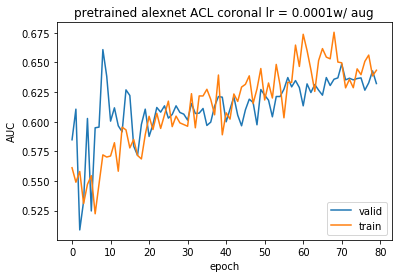

In [0]:
#cor w/ aug
diagnosis = 'ACL'
orientation = 'coronal'
lr = 0.0001
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data meniscus axial
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:04<00:00, 59.2MB/s]


starting epoch 1. time passed: 0:00:00.000012
train loss: 0.7407
train AUC: 0.4894
valid loss: 0.3398
valid AUC: 0.6015
starting epoch 2. time passed: 0:02:55.895788
train loss: 0.3201
train AUC: 0.5196
valid loss: 0.3402
valid AUC: 0.5814
starting epoch 3. time passed: 0:03:51.406959
train loss: 0.3340
train AUC: 0.5053
valid loss: 0.3404
valid AUC: 0.4665
starting epoch 4. time passed: 0:04:45.740098
train loss: 0.3161
train AUC: 0.4528
valid loss: 0.3404
valid AUC: 0.6134
starting epoch 5. time passed: 0:05:39.917149
train loss: 0.3896
train AUC: 0.4931
valid loss: 0.3404
valid AUC: 0.5591
starting epoch 6. time passed: 0:06:33.570808
train loss: 0.3216
train AUC: 0.4599
valid loss: 0.3404
valid AUC: 0.5249
starting epoch 7. time passed: 0:07:28.152116
train loss: 0.3161
train AUC: 0.4484
valid loss: 0.3404
valid AUC: 0.5358
starting epoch 8. time passed: 0:08:22.743304
train loss: 0.3160
train AUC: 0.4610
valid loss: 0.3404
valid AUC: 0.4926
starting epoch 9. time passed: 0:09:16.9

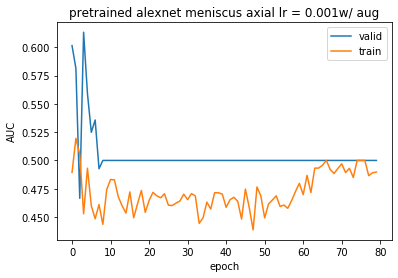

In [0]:
#axial w/o aug
diagnosis = 'meniscus'
orientation = 'axial'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data meniscus axial
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000010
train loss: 1.7172
train AUC: 0.5225
valid loss: 0.3400
valid AUC: 0.6080
starting epoch 2. time passed: 0:01:25.509424
train loss: 0.3464
train AUC: 0.5304
valid loss: 0.3415
valid AUC: 0.5065
starting epoch 3. time passed: 0:02:51.348184
train loss: 0.6461
train AUC: 0.5184
valid loss: 0.3406
valid AUC: 0.4115
starting epoch 4. time passed: 0:04:17.799896
train loss: 0.3198
train AUC: 0.4751
valid loss: 0.3404
valid AUC: 0.5452
starting epoch 5. time passed: 0:05:44.477809
train loss: 0.3208
train AUC: 0.5262
valid loss: 0.3397
valid AUC: 0.6270
starting epoch 6. time passed: 0:07:10.660452
train loss: 0.3700
train AUC: 0.5279
valid loss: 0.3404
valid AUC: 0.5445
starting epoch 7. time passed: 0:08:36.704571
train loss: 0.3161
train 

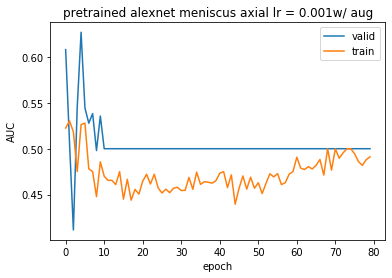

In [0]:
#axial w/ aug
diagnosis = 'meniscus'
orientation = 'axial'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000011
train loss: 0.6928
train AUC: 0.5070
valid loss: 0.3392
valid AUC: 0.5744
starting epoch 2. time passed: 0:03:22.730181
train loss: 0.3247
train AUC: 0.4698
valid loss: 0.3404
valid AUC: 0.5246
starting epoch 3. time passed: 0:04:18.134887
train loss: 0.4835
train AUC: 0.4453
valid loss: 0.3410
valid AUC: 0.5079
starting epoch 4. time passed: 0:05:06.878532
train loss: 0.3775
train AUC: 0.4792
valid loss: 0.3406
valid AUC: 0.4516
starting epoch 5. time passed: 0:05:55.636907
train loss: 0.3167
train AUC: 0.4613
valid loss: 0.3404
valid AUC: 0.5079
starting epoch 6. time passed: 0:06:44.364307
train loss: 0.3161
train AUC: 0.4869
valid loss: 0.3404
valid AUC: 0.4727
starting epoch 7. time passed: 0:07:33.311564
train loss: 0.3160
trai

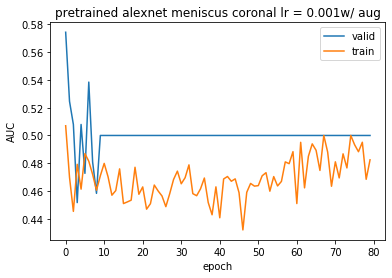

In [0]:
#coronal w/o aug
diagnosis = 'meniscus'
orientation = 'coronal'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000014
train loss: 1.3642
train AUC: 0.5363
valid loss: 0.3490
valid AUC: 0.5334
starting epoch 2. time passed: 0:02:27.367700
train loss: 0.7303
train AUC: 0.4675
valid loss: 0.3405
valid AUC: 0.5136
starting epoch 3. time passed: 0:03:47.784624
train loss: 0.3243
train AUC: 0.4884
valid loss: 0.3405
valid AUC: 0.4723
starting epoch 4. time passed: 0:05:07.676133
train loss: 0.3215
train AUC: 0.4717
valid loss: 0.3425
valid AUC: 0.4683
starting epoch 5. time passed: 0:06:28.673176
train loss: 0.3334
train AUC: 0.5038
valid loss: 0.3404
valid AUC: 0.5757
starting epoch 6. time passed: 0:07:49.899013
train loss: 0.6901
train AUC: 0.4877
valid loss: 0.3404
valid AUC: 0.5551
starting epoch 7. time passed: 0:09:11.191848
train loss: 0.3170
trai

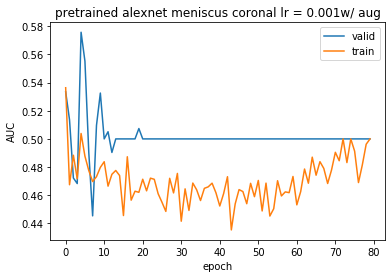

In [0]:
# trying noise
#coronal w aug
diagnosis = 'meniscus'
orientation = 'coronal'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 1. time passed: 0:00:00.000012
train loss: 0.7321
train AUC: 0.5075
train loss: 0.7321
train AUC: 0.5075
valid loss: 0.4558
valid AUC: 0.5348
starting epoch 2. time passed: 0:01:18.825585
valid loss: 0.4558
valid AUC: 0.5348
starting epoch 2. time passed: 0:01:18.825585
train loss: 1.1970
train AUC: 0.5066
train loss: 1.1970
train AUC: 0.5066
valid loss: 0.3403
valid AUC: 0.5427
starting epoch 3. time passed: 0:02:37.808905
valid loss: 0.3403
valid AUC: 0.5427
starting epoch 3. time passed: 0:02:37.808905
train 

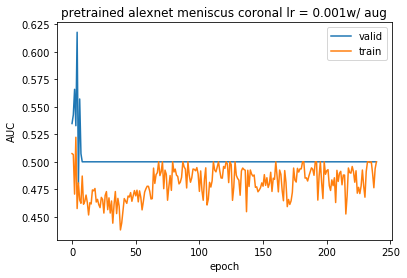

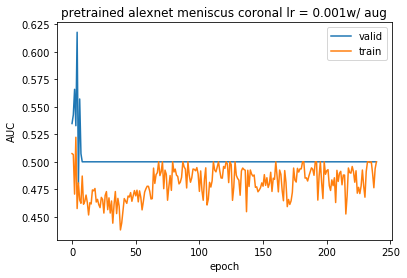

In [0]:
# trying noise
#coronal w aug
epochs = 240
diagnosis = 'meniscus'
orientation = 'coronal'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

In [0]:
# trying noise
#coronal w aug
epochs = 5
diagnosis = 'meniscus'
orientation = 'coronal'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000016
gap x torch.Size([32, 256])
max x torch.Size([1, 256])
x tensor([[-0.2807]], device='cuda:0', grad_fn=<AddmmBackward>)
gap x torch.Size([46, 256])
max x torch.Size([1, 256])
x tensor([[438.4600]], device='cuda:0', grad_fn=<AddmmBackward>)
gap x torch.Size([32, 256])
max x torch.Size([1, 256])
x tensor([[10.9885]], device='cuda:0', grad_fn=<AddmmBackward>)
gap x torch.Size([33, 256])
max x torch.Size([1, 256])
x tensor([[0.4495]], device='cuda:0', grad_fn=<AddmmBackward>)
gap x torch.Size([38, 256])
max x torch.Size([1, 256])
x tensor([[0.7738]], device='cuda:0', grad_fn=<AddmmBackward>)
gap x torch.Size([23, 256])
max x torch.Size([1, 256])
x tensor([[0.1458]], device='cuda:0', grad_fn=<AddmmBackward>)
gap x torch.Size([39, 256])
max

KeyboardInterrupt: ignored

load_data meniscus sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000011
train loss: 17052.5744
train AUC: 0.5001
valid loss: 0.3427
valid AUC: 0.5000
starting epoch 2. time passed: 0:05:59.046569
train loss: 36114.3450
train AUC: 0.4851
valid loss: 0.3686
valid AUC: 0.5000
starting epoch 3. time passed: 0:07:26.329809
train loss: 0.3538
train AUC: 0.5083
valid loss: 0.3404
valid AUC: 0.5000
starting epoch 4. time passed: 0:08:49.851068
train loss: 320.4144
train AUC: 0.4929
valid loss: 1.5707
valid AUC: 0.5000
starting epoch 5. time passed: 0:10:13.328484
train loss: 0.3548
train AUC: 0.4345
valid loss: 0.3407
valid AUC: 0.5000
starting epoch 6. time passed: 0:11:36.806449
train loss: 10.8796
train AUC: 0.5097
valid loss: 0.3450
valid AUC: 0.5000
starting epoch 7. time passed: 0:13:00.934668
train loss:

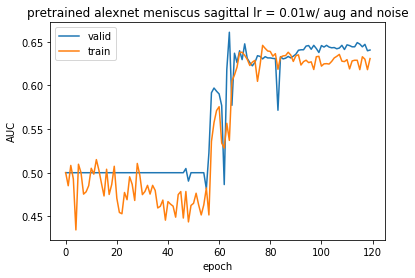

In [0]:
#sag w/ aug and noise
diagnosis = 'meniscus'
orientation = 'sagittal'
epochs = 120
lr = 0.01
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug and noise', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:02:28.548663
starting epoch 3. time passed: 0:03:21.603575
starting epoch 4. time passed: 0:04:15.031755
starting epoch 5. time passed: 0:05:08.667874
starting epoch 6. time passed: 0:06:02.585285
starting epoch 7. time passed: 0:06:56.557319
starting epoch 8. time passed: 0:07:49.905801
starting epoch 9. time passed: 0:08:44.050898
starting epoch 10. time passed: 0:09:37.812528
starting epoch 11. time passed: 0:10:31.781930
starting epoch 12. time passed: 0:11:26.047859
starting epoch 13. time passed: 0:12:19.998848
starting epoch 14. time passed: 0:13:13.967189
starting epoch 15. time passed: 0:14:08.117590
starting epoch 16. time passed: 0:15:02.586699
starting epoch 17. time passed: 0:15:56.537647
starting epoch 18. time passed: 0:

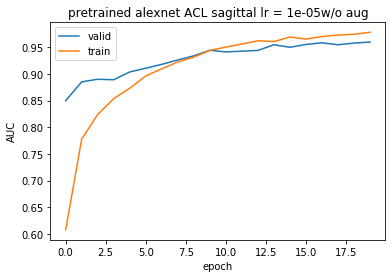

In [0]:
#sag w/o aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 20
lr = 1e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:01:42.362786
starting epoch 3. time passed: 0:03:24.317956
starting epoch 4. time passed: 0:05:06.484650
starting epoch 5. time passed: 0:06:48.907010
starting epoch 6. time passed: 0:08:31.632907
starting epoch 7. time passed: 0:10:14.050618
starting epoch 8. time passed: 0:11:56.624139
starting epoch 9. time passed: 0:13:38.848216
starting epoch 10. time passed: 0:15:21.198522
starting epoch 11. time passed: 0:17:03.780735
starting epoch 12. time passed: 0:18:46.143932
starting epoch 13. time passed: 0:20:28.632746
starting epoch 14. time passed: 0:22:10.990417
starting epoch 15. time passed: 0:23:53.209596
starting epoch 16. time passed: 0:25:35.772841
starting epoch 17. time passed: 0:27:18.144571
starting epoch 18. time passed: 0:

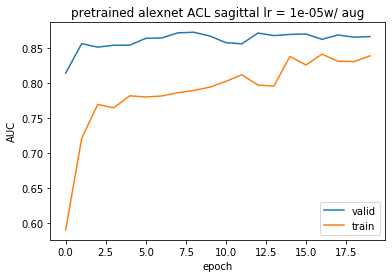

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 20
lr = 1e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:01:44.881893
starting epoch 3. time passed: 0:03:30.471773
starting epoch 4. time passed: 0:05:15.271807
starting epoch 5. time passed: 0:07:00.652555
starting epoch 6. time passed: 0:08:45.488107
starting epoch 7. time passed: 0:10:29.418561
starting epoch 8. time passed: 0:12:13.853327
starting epoch 9. time passed: 0:13:58.340565
starting epoch 10. time passed: 0:15:43.059200
starting epoch 11. time passed: 0:17:26.987130
starting epoch 12. time passed: 0:19:11.019901
starting epoch 13. time passed: 0:20:56.333056
starting epoch 14. time passed: 0:22:41.119533
starting epoch 15. time passed: 0:24:27.640816
starting epoch 16. time passed: 0:26:11.990593
starting epoch 17. time passed: 0:27:56.123851
starting epoch 18. time passed: 0:

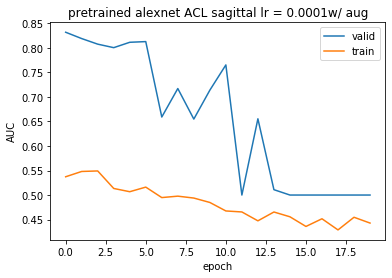

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 20
lr = 1e-04
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:01:48.435511
starting epoch 3. time passed: 0:03:35.071960
starting epoch 4. time passed: 0:05:24.098855
starting epoch 5. time passed: 0:07:11.504162
starting epoch 6. time passed: 0:08:58.450077
starting epoch 7. time passed: 0:10:45.401798
starting epoch 8. time passed: 0:12:32.867158
starting epoch 9. time passed: 0:14:19.468940
starting epoch 10. time passed: 0:16:05.915511
starting epoch 11. time passed: 0:17:52.238063
starting epoch 12. time passed: 0:19:39.135934
starting epoch 13. time passed: 0:21:25.345905
starting epoch 14. time passed: 0:23:11.718299
starting epoch 15. time passed: 0:24:57.955995
starting epoch 16. time passed: 0:26:44.726080
starting epoch 17. time passed: 0:28:31.414371
starting epoch 18. time passed: 0:

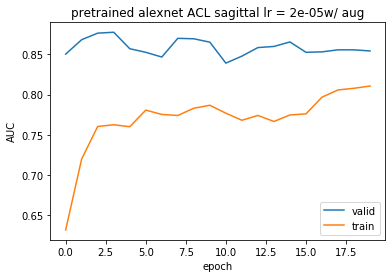

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 20
lr = 2e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:01:56.166676
starting epoch 3. time passed: 0:03:56.246285
starting epoch 4. time passed: 0:05:56.677044
starting epoch 5. time passed: 0:07:55.379589
starting epoch 6. time passed: 0:09:51.679677
starting epoch 7. time passed: 0:11:46.341134
starting epoch 8. time passed: 0:13:39.083312
starting epoch 9. time passed: 0:15:32.822948
starting epoch 10. time passed: 0:17:24.915381
starting epoch 11. time passed: 0:19:15.243563
starting epoch 12. time passed: 0:21:05.021208
starting epoch 13. time passed: 0:22:57.407305
starting epoch 14. time passed: 0:24:50.084003
starting epoch 15. time passed: 0:26:40.600932
starting epoch 16. time passed: 0:28:30.468755
starting epoch 17. time passed: 0:30:20.635396
starting epoch 18. time passed: 0:

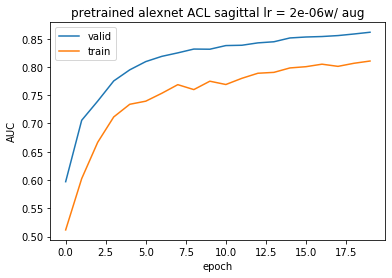

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 20
lr = 2e-06
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:09<00:00, 24.6MB/s]


starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:03:39.738673
starting epoch 3. time passed: 0:05:32.262294
starting epoch 4. time passed: 0:07:25.003954
starting epoch 5. time passed: 0:09:18.594649
starting epoch 6. time passed: 0:11:12.336272
starting epoch 7. time passed: 0:13:05.813658
starting epoch 8. time passed: 0:15:00.397477
starting epoch 9. time passed: 0:16:55.277079
starting epoch 10. time passed: 0:18:49.783783
starting epoch 11. time passed: 0:20:44.455865
starting epoch 12. time passed: 0:22:39.342778
starting epoch 13. time passed: 0:24:34.507835
starting epoch 14. time passed: 0:26:29.941709
starting epoch 15. time passed: 0:28:25.183626
starting epoch 16. time passed: 0:30:19.320170
starting epoch 17. time passed: 0:32:12.809419
starting epoch 18. time passed: 0:34:06.904465
starting epoch 19. time passed: 0:35:58.635895
starting epoch 20. time passed: 0:37:49.216696
starting epoch 21. time passed: 0:39:38.654534
starting epoch 22. tim

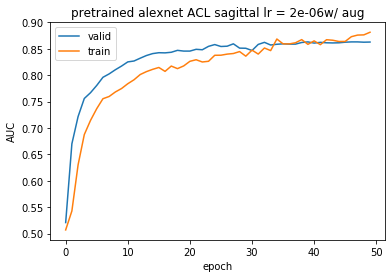

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 50
lr = 2e-06
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:03:19.489806
starting epoch 3. time passed: 0:04:20.220322
starting epoch 4. time passed: 0:05:18.193971
starting epoch 5. time passed: 0:06:15.754269
starting epoch 6. time passed: 0:07:14.026281
starting epoch 7. time passed: 0:08:12.179982
starting epoch 8. time passed: 0:09:10.685644
starting epoch 9. time passed: 0:10:09.043068
starting epoch 10. time passed: 0:11:07.804802
starting epoch 11. time passed: 0:12:06.545274
starting epoch 12. time passed: 0:13:05.204960
starting epoch 13. time passed: 0:14:03.655666
starting epoch 14. time passed: 0:15:02.482505
starting epoch 15. time passed: 0:16:01.377427
starting epoch 16. time passed: 0:17:00.741696
starting epoch 17. time passed: 0:17:59.720921

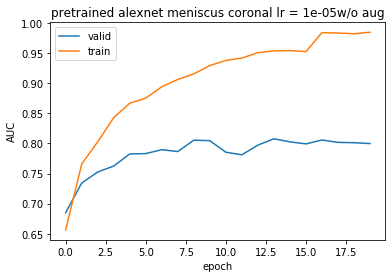

In [0]:
#cor w/o aug
diagnosis = 'meniscus'
orientation = 'coronal'
epochs = 20
lr = 1e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:02:19.674444
starting epoch 3. time passed: 0:04:40.482359
starting epoch 4. time passed: 0:07:02.929206
starting epoch 5. time passed: 0:09:24.683995
starting epoch 6. time passed: 0:11:48.238125
starting epoch 7. time passed: 0:14:11.463351
starting epoch 8. time passed: 0:16:35.902538
starting epoch 9. time passed: 0:18:59.692585
starting epoch 10. time passed: 0:21:23.052803
starting epoch 11. time passed: 0:23:46.637225
starting epoch 12. time passed: 0:26:10.891123
starting epoch 13. time passed: 0:28:35.174459
starting epoch 14. time passed: 0:31:15.055778
starting epoch 15. time passed: 0:33:52.514154
starting epoch 16. time passed: 0:36:29.390364
starting epoch 17. time passed: 0:39:04.633689

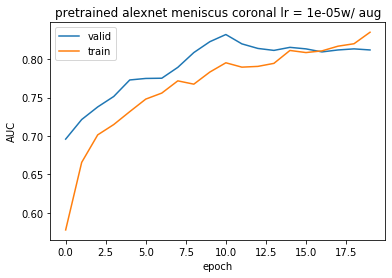

In [0]:
#cor w/ aug
diagnosis = 'meniscus'
orientation = 'coronal'
epochs = 20
lr = 1e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

In [0]:
# model.py

import torch
import torch.nn as nn

from torchvision import models

class MRNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.vgg11_bn(pretrained=True)
        self.gap = nn.AdaptiveAvgPool2d(1)
        #self.classifier = nn.Linear(1024, 1)
        self.classifier = nn.Linear(512, 1)

    # change this to adapt to different networks
    def forward(self, x):
        x = torch.squeeze(x, dim=0) # only batch size 1 supported
        x = self.model.features(x)
        # make sure that gap returns size 256
        x = self.gap(x).view(x.size(0), -1)
        x = torch.max(x, 0, keepdim=True)[0]
        x = self.classifier(x)
        return x

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]


Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:09<00:00, 57.9MB/s]


starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:04:21.987122
starting epoch 3. time passed: 0:08:09.866819
starting epoch 4. time passed: 0:11:57.522044
starting epoch 5. time passed: 0:15:45.328277
starting epoch 6. time passed: 0:19:33.211530
starting epoch 7. time passed: 0:23:21.046106
starting epoch 8. time passed: 0:27:09.447233
starting epoch 9. time passed: 0:30:57.625215
starting epoch 10. time passed: 0:34:45.947817
starting epoch 11. time passed: 0:38:34.244305
starting epoch 12. time passed: 0:42:22.878222
starting epoch 13. time passed: 0:46:11.510507
starting epoch 14. time passed: 0:49:59.940640
starting epoch 15. time passed: 0:53:48.423583
starting epoch 16. time passed: 0:57:36.840780
starting epoch 17. time passed: 1:01:25.050772
starting epoch 18. time passed: 1:05:13.346211
starting epoch 19. time passed: 1:09:01.745417
starting epoch 20. time passed: 1:12:50.106175


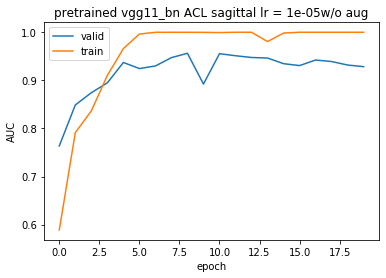

In [0]:
#sag w/o aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 20
lr = 1e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, False, gpu)
title = 'pretrained vgg11_bn ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:03:49.294558
starting epoch 3. time passed: 0:07:38.710322
starting epoch 4. time passed: 0:11:28.036957
starting epoch 5. time passed: 0:15:17.526267
starting epoch 6. time passed: 0:19:06.870279
starting epoch 7. time passed: 0:22:56.357340
starting epoch 8. time passed: 0:26:46.263695
starting epoch 9. time passed: 0:30:35.872493
starting epoch 10. time passed: 0:34:25.667985
starting epoch 11. time passed: 0:38:15.390184
starting epoch 12. time passed: 0:42:05.062454
starting epoch 13. time passed: 0:45:54.574583
starting epoch 14. time passed: 0:49:43.917810
starting epoch 15. time passed: 0:53:33.205993
starting epoch 16. time passed: 0:57:22.769799
starting epoch 17. time passed: 1:01:12.388647
starting epoch 18. time passed: 1:

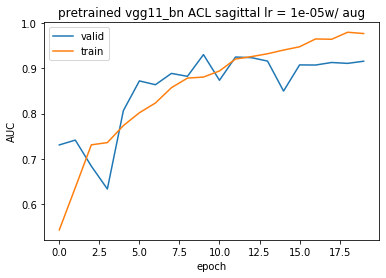

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 20
lr = 1e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained vgg11_bn ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:03:49.845659
starting epoch 3. time passed: 0:07:39.940463
starting epoch 4. time passed: 0:11:30.201431
starting epoch 5. time passed: 0:15:20.331638
starting epoch 6. time passed: 0:19:10.454401
starting epoch 7. time passed: 0:23:00.517627
starting epoch 8. time passed: 0:26:50.372958
starting epoch 9. time passed: 0:30:40.090827
starting epoch 10. time passed: 0:34:30.088290
starting epoch 11. time passed: 0:38:20.206553
starting epoch 12. time passed: 0:42:10.250022
starting epoch 13. time passed: 0:46:00.079616
starting epoch 14. time passed: 0:49:49.957673
starting epoch 15. time passed: 0:53:39.756131
starting epoch 16. time passed: 0:57:29.342721
starting epoch 17. time passed: 1:01:19.350649
starting epoch 18. time passed: 1:

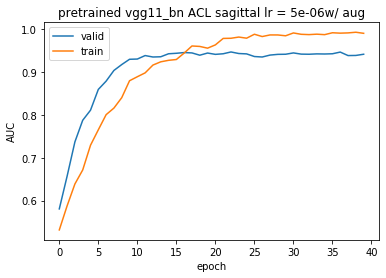

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 40
lr = 5e-06
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained vgg11_bn ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:03:50.594652
starting epoch 3. time passed: 0:07:41.201024
starting epoch 4. time passed: 0:11:31.445837
starting epoch 5. time passed: 0:15:21.711006
starting epoch 6. time passed: 0:19:11.781118
starting epoch 7. time passed: 0:23:01.815934
starting epoch 8. time passed: 0:26:52.042096
starting epoch 9. time passed: 0:30:42.444237
starting epoch 10. time passed: 0:34:33.140262
starting epoch 11. time passed: 0:38:24.070057
starting epoch 12. time passed: 0:42:14.431485
starting epoch 13. time passed: 0:46:04.971122
starting epoch 14. time passed: 0:49:55.578335
starting epoch 15. time passed: 0:53:46.000007
starting epoch 16. time passed: 0:57:36.421968
starting epoch 17. time passed: 1:01:26.876020
starting epoch 18. time passed: 1:

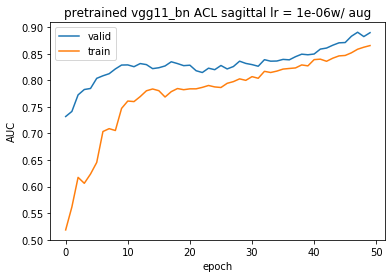

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 50
lr = 1e-06
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained vgg11_bn ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

In [0]:
import math
import torch
from torch.optim.optimizer import Optimizer, required

class RAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, degenerated_to_sgd=True):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        
        self.degenerated_to_sgd = degenerated_to_sgd
        if isinstance(params, (list, tuple)) and len(params) > 0 and isinstance(params[0], dict):
            for param in params:
                if 'betas' in param and (param['betas'][0] != betas[0] or param['betas'][1] != betas[1]):
                    param['buffer'] = [[None, None, None] for _ in range(10)]
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay, buffer=[[None, None, None] for _ in range(10)])
        super(RAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(RAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                buffered = group['buffer'][int(state['step'] % 10)]
                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma

                    # more conservative since it's an approximated value
                    if N_sma >= 5:
                        step_size = math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    elif self.degenerated_to_sgd:
                        step_size = 1.0 / (1 - beta1 ** state['step'])
                    else:
                        step_size = -1
                    buffered[2] = step_size

                # more conservative since it's an approximated value
                if N_sma >= 5:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size * group['lr'], exp_avg, denom)
                    p.data.copy_(p_data_fp32)
                elif step_size > 0:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    p_data_fp32.add_(-step_size * group['lr'], exp_avg)
                    p.data.copy_(p_data_fp32)

        return loss

class PlainRAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, degenerated_to_sgd=True):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
                    
        self.degenerated_to_sgd = degenerated_to_sgd
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)

        super(PlainRAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(PlainRAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                beta2_t = beta2 ** state['step']
                N_sma_max = 2 / (1 - beta2) - 1
                N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)


                # more conservative since it's an approximated value
                if N_sma >= 5:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    step_size = group['lr'] * math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size, exp_avg, denom)
                    p.data.copy_(p_data_fp32)
                elif self.degenerated_to_sgd:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    step_size = group['lr'] / (1 - beta1 ** state['step'])
                    p_data_fp32.add_(-step_size, exp_avg)
                    p.data.copy_(p_data_fp32)

        return loss


class AdamW(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, warmup = 0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, warmup = warmup)
        super(AdamW, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamW, self).__setstate__(state)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                denom = exp_avg_sq.sqrt().add_(group['eps'])
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                
                if group['warmup'] > state['step']:
                    scheduled_lr = 1e-8 + state['step'] * group['lr'] / group['warmup']
                else:
                    scheduled_lr = group['lr']

                step_size = scheduled_lr * math.sqrt(bias_correction2) / bias_correction1
                
                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * scheduled_lr, p_data_fp32)

                p_data_fp32.addcdiv_(-step_size, exp_avg, denom)

                p.data.copy_(p_data_fp32)

        return loss

In [0]:
import argparse
import json
import numpy as np
import os
import torch

from datetime import datetime
from pathlib import Path
from sklearn import metrics

#from evaluate import run_model
#from loader import load_data
#from model import MRNet

def train(rundir, diagnosis, orientation, epochs, learning_rate, transformbool, use_gpu):
    
    val_auc_array = list()
    train_auc_array = list()
    train_loader, valid_loader, test_loader = load_data(diagnosis, orientation, transformbool, use_gpu)
    
    model = MRNet()
    
    if use_gpu:
        model = model.cuda()

    # modify the code in this
    # try with RAdam
    # grid search?
    # can try without weight decay
    optimizer = RAdam(model.parameters(), learning_rate, weight_decay=.01)
    #optimizer = torch.optim.AdamW(model.parameters(), learning_rate, weight_decay=0.01)

    # patience too low (after 5 epochs, if AUC hasnt improved, slash learning rate .3), which is why high learning rate seems to work better
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=.3, threshold=1e-4)

    best_val_loss = float('inf')

    start_time = datetime.now()

    for epoch in range(epochs):
        change = datetime.now() - start_time
        print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
        
        train_loss, train_auc, _, _ = run_model(model, train_loader, train=True, optimizer=optimizer)
        #print(f'train loss: {train_loss:0.4f}')
        #print(f'train AUC: {train_auc:0.4f}')

        val_loss, val_auc, _, _ = run_model(model, valid_loader)
        #print(f'valid loss: {val_loss:0.4f}')
        #print(f'valid AUC: {val_auc:0.4f}')
        val_auc_array.append(val_auc)
        train_auc_array.append(train_auc)
        
        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss

            file_name = f'val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
            save_path = Path(rundir) / file_name

            # dont need to save stuff for now, model is too shitty
            #torch.save(model.state_dict(), save_path)
            #if epoch == (epochs-1):
            #  print('model saved at', str(save_path))
            #  torch.save(model.state_dict(), save_path)
            
    return val_auc_array, train_auc_array


load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:12<00:00, 20.2MB/s]


starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:00:58.262667
starting epoch 3. time passed: 0:01:56.533551
starting epoch 4. time passed: 0:02:53.990057
starting epoch 5. time passed: 0:03:51.622897
starting epoch 6. time passed: 0:04:48.920934
starting epoch 7. time passed: 0:05:46.297063
starting epoch 8. time passed: 0:06:43.209988
starting epoch 9. time passed: 0:07:40.059272
starting epoch 10. time passed: 0:08:37.080026
starting epoch 11. time passed: 0:09:33.572292
starting epoch 12. time passed: 0:10:30.508287
starting epoch 13. time passed: 0:11:27.549854
starting epoch 14. time passed: 0:12:24.573010
starting epoch 15. time passed: 0:13:21.841494
starting epoch 16. time passed: 0:14:19.025670
starting epoch 17. time passed: 0:15:16.258556
starting epoch 18. time passed: 0:16:13.489049
starting epoch 19. time passed: 0:17:10.511699
starting epoch 20. time passed: 0:18:07.955384


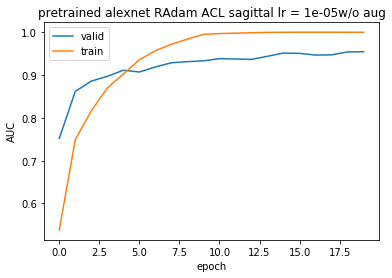

In [0]:
#sag w/o aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 20
lr = 1e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, False, gpu)
title = 'pretrained alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000010
starting epoch 2. time passed: 0:01:46.218463
starting epoch 3. time passed: 0:03:32.476774
starting epoch 4. time passed: 0:05:18.722436
starting epoch 5. time passed: 0:07:05.173695
starting epoch 6. time passed: 0:08:51.435703
starting epoch 7. time passed: 0:10:37.885810
starting epoch 8. time passed: 0:12:24.654772
starting epoch 9. time passed: 0:14:11.139384
starting epoch 10. time passed: 0:15:57.731430
starting epoch 11. time passed: 0:17:44.785676
starting epoch 12. time passed: 0:19:31.072804
starting epoch 13. time passed: 0:21:17.267089
starting epoch 14. time passed: 0:23:03.781069
starting epoch 15. time passed: 0:24:49.646638
starting epoch 16. time passed: 0:26:35.911557
starting epoch 17. time passed: 0:28:22.676324
starting epoch 18. time passed: 0:

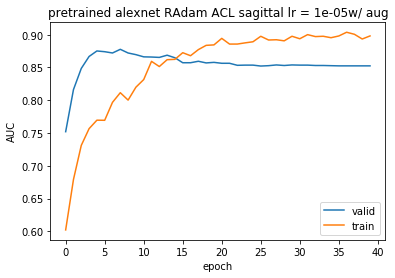

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 40
lr = 1e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000010
starting epoch 2. time passed: 0:01:47.931919
starting epoch 3. time passed: 0:03:35.366604
starting epoch 4. time passed: 0:05:22.455208
starting epoch 5. time passed: 0:07:09.957401
starting epoch 6. time passed: 0:08:58.148473
starting epoch 7. time passed: 0:10:45.194515
starting epoch 8. time passed: 0:12:33.210099
starting epoch 9. time passed: 0:14:22.101487
starting epoch 10. time passed: 0:16:09.225065
starting epoch 11. time passed: 0:17:55.216357
starting epoch 12. time passed: 0:19:42.448046
starting epoch 13. time passed: 0:21:29.797118
starting epoch 14. time passed: 0:23:16.548693
starting epoch 15. time passed: 0:25:03.572404
starting epoch 16. time passed: 0:26:50.412667
starting epoch 17. time passed: 0:28:36.871259
starting epoch 18. time passed: 0:

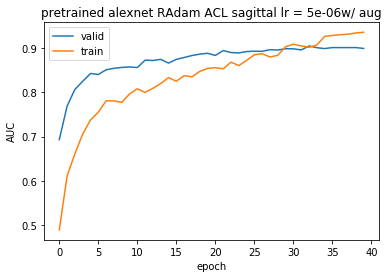

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 40
lr = 5e-06
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000010
starting epoch 2. time passed: 0:01:47.669417
starting epoch 3. time passed: 0:03:34.054852
starting epoch 4. time passed: 0:05:20.230190
starting epoch 5. time passed: 0:07:07.573052
starting epoch 6. time passed: 0:08:55.471724
starting epoch 7. time passed: 0:10:42.760137
starting epoch 8. time passed: 0:12:28.704387
starting epoch 9. time passed: 0:14:17.226211
starting epoch 10. time passed: 0:16:02.540916
starting epoch 11. time passed: 0:17:48.884591
starting epoch 12. time passed: 0:19:34.789162
starting epoch 13. time passed: 0:21:19.827444
starting epoch 14. time passed: 0:23:04.513925
starting epoch 15. time passed: 0:24:51.015754
starting epoch 16. time passed: 0:26:36.932921
starting epoch 17. time passed: 0:28:21.625326
starting epoch 18. time passed: 0:

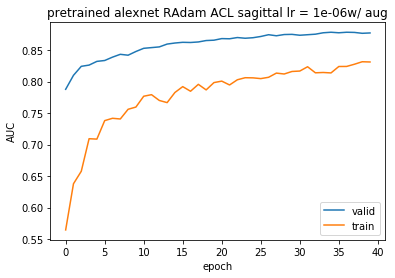

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 40
lr = 1e-06
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000010
starting epoch 2. time passed: 0:01:44.588173
starting epoch 3. time passed: 0:03:27.708932
starting epoch 4. time passed: 0:05:11.423236
starting epoch 5. time passed: 0:06:54.113616
starting epoch 6. time passed: 0:08:36.935038
starting epoch 7. time passed: 0:10:19.826089
starting epoch 8. time passed: 0:12:03.241828
starting epoch 9. time passed: 0:13:46.729673
starting epoch 10. time passed: 0:15:30.028937
starting epoch 11. time passed: 0:17:13.355101
starting epoch 12. time passed: 0:18:55.346112
starting epoch 13. time passed: 0:20:37.625646
starting epoch 14. time passed: 0:22:19.487691
starting epoch 15. time passed: 0:24:01.751323
starting epoch 16. time passed: 0:25:43.707628
starting epoch 17. time passed: 0:27:26.492395
starting epoch 18. time passed: 0:

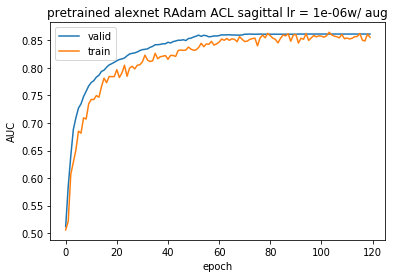

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 120
lr = 1e-06
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:01<00:00, 159MB/s]


starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:04:24.589229
starting epoch 3. time passed: 0:06:25.424726
starting epoch 4. time passed: 0:08:25.638106
starting epoch 5. time passed: 0:10:26.683556
starting epoch 6. time passed: 0:12:27.742540
starting epoch 7. time passed: 0:14:27.419242
starting epoch 8. time passed: 0:16:30.698618
starting epoch 9. time passed: 0:18:34.048279
starting epoch 10. time passed: 0:20:37.609531
starting epoch 11. time passed: 0:22:41.393264
starting epoch 12. time passed: 0:24:44.888826
starting epoch 13. time passed: 0:26:48.005935
starting epoch 14. time passed: 0:28:51.845810
starting epoch 15. time passed: 0:30:56.860091
starting epoch 16. time passed: 0:32:59.746645
starting epoch 17. time passed: 0:35:03.507953
starting epoch 18. time passed: 0:37:07.000486
starting epoch 19. time passed: 0:39:10.718963
starting epoch 20. time passed: 0:41:14.134492
starting epoch 21. time passed: 0:43:18.128818
starting epoch 22. tim

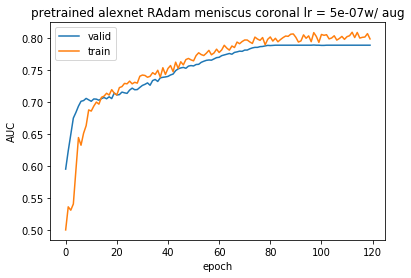

In [0]:
#coronal w/ aug
diagnosis = 'meniscus'
orientation = 'coronal'
epochs = 120
lr = 5e-07
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:01<00:00, 210MB/s]


starting epoch 1. time passed: 0:00:00.000010
starting epoch 2. time passed: 0:03:59.015899
starting epoch 3. time passed: 0:05:46.002842
starting epoch 4. time passed: 0:07:33.702181
starting epoch 5. time passed: 0:09:22.342792
starting epoch 6. time passed: 0:11:11.523446
starting epoch 7. time passed: 0:13:01.877390
starting epoch 8. time passed: 0:14:52.194605
starting epoch 9. time passed: 0:16:43.393041
starting epoch 10. time passed: 0:18:35.544387
starting epoch 11. time passed: 0:20:26.563525
starting epoch 12. time passed: 0:22:18.862897
starting epoch 13. time passed: 0:24:08.392136
starting epoch 14. time passed: 0:25:57.858525
starting epoch 15. time passed: 0:27:46.230277
starting epoch 16. time passed: 0:29:34.398742
starting epoch 17. time passed: 0:31:22.958206
starting epoch 18. time passed: 0:33:10.894512
starting epoch 19. time passed: 0:34:59.398513
starting epoch 20. time passed: 0:36:46.628734
starting epoch 21. time passed: 0:38:34.877986
starting epoch 22. tim

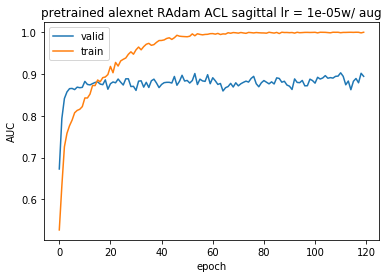

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 120
lr = 1e-05
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:01:52.249554
starting epoch 3. time passed: 0:03:43.821264
starting epoch 4. time passed: 0:05:37.314871
starting epoch 5. time passed: 0:07:31.144555
starting epoch 6. time passed: 0:09:24.711313
starting epoch 7. time passed: 0:11:17.975712
starting epoch 8. time passed: 0:13:10.738775
starting epoch 9. time passed: 0:15:04.226815
starting epoch 10. time passed: 0:16:58.106974
starting epoch 11. time passed: 0:18:52.936429
starting epoch 12. time passed: 0:20:46.598015
starting epoch 13. time passed: 0:22:39.518633
starting epoch 14. time passed: 0:24:32.438904
starting epoch 15. time passed: 0:26:27.007675
starting epoch 16. time passed: 0:28:19.132516
starting epoch 17. time passed: 0:30:14.080840
starting epoch 18. time passed: 0:

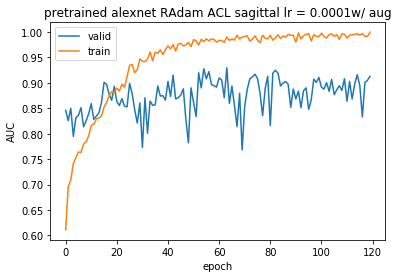

In [0]:
#sag w/ aug
diagnosis = 'ACL'
orientation = 'sagittal'
epochs = 120
lr = 1e-04
varray1, tarray1 = train(rundir, diagnosis, orientation, epochs, lr, True, gpu)
title = 'pretrained alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

In [0]:

#evaluate('test', 'val0.0175_train0.0139_epoch50', 1, True)

In [0]:

def display1_line(x_length, lr1, y1, lr2, y2, lr3, y3, lr4, y4, lr5, y5, title, xlabel, ylabel):
  plt.figure(0)
  # see if we can set axis later
  #ax = plt.axis()
  #ax.set(xlim = (np.min(x),np.max(x)), option='tight')
  plt.title(title)
  plt.plot(np.arange(x_length), y1, label=str(lr1))
  plt.plot(np.arange(x_length), y2, label=str(lr2))
  plt.plot(np.arange(x_length), y3, label=str(lr3))
  plt.plot(np.arange(x_length), y4, label=str(lr4))
  plt.plot(np.arange(x_length), y5, label=str(lr5))
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  return

display1_line(epochs, 5e-06, varray1, 1e-05, varray2, 5e-05, varray3, 1e-04, varray4, 1e-03, varray5, "AUC loss over epochs diagnosis = " + str(diagnosis), "epoch", "Validation AUC")

In [0]:
# notes from ben
# get rid of double standardization, dont have RGB channels all have same information, make AlexNet take 1 channel instead of 3. 
# try to dissect images into two camps, 3.0T and 1.5T.
# Then we can try to change into DenseNets. 

In [0]:
p-values[rot, crop, shift] = [0.3, 0.4, 0.5]

for every image in folder:
  load image

  if random number generator < p-values rot:
    image = rotate image (by x degrees)
  if random number generator < p-values crop:
    image = crop image (by x,y values)
  if random number generator < p-values shift:
    image = shift image (by x values in y direction)

  convert image into tensor for processing
  send image to training batch, grab next image

In [0]:
define initial state of model
(Lets say a simple model of 3 layers, with ReLU activation functions and
 down-sampling method of max pool. Input image is 256x256)
features = Sequential model: 
  Layer: Convolutional 2 dimensional (256 input, 128 output, padding = 2)
  Activation Function: ReLU
  Down-Sample: maxpool
  Layer: Convolutional 2 dimensional (128 input, 64 output, padding = 2)
  Activation Function: ReLU
  Down-Sample: maxpool
  Layer: Convolutional 2 dimensional (64 input, 32 output, padding = 2)
  Activation Function: ReLU
  Down-Sample: maxpool

  Layer: Softmax (to convert a 32x32 matrix to probability distribution used to classify)
